/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Performance Metrics:

Support Vector Classifier Metrics:
  Mean Accuracy: 0.9319
  Precision: 0.8684
  Recall: 0.9319
  F1 Score: 0.8990


Random Forest Classifier Metrics:
  Mean Accuracy: 0.9980
  Precision: 0.9980
  Recall: 0.9980
  F1 Score: 0.9980


Decision Tree Classifier Metrics:
  Mean Accuracy: 0.9992
  Precision: 0.9992
  Recall: 0.9992
  F1 Score: 0.9992


Linear Regression Classifier Metrics:
  Mean Accuracy: 0.9319
  Precision: 0.8684
  Recall: 0.9319
  F1 Score: 0.8990




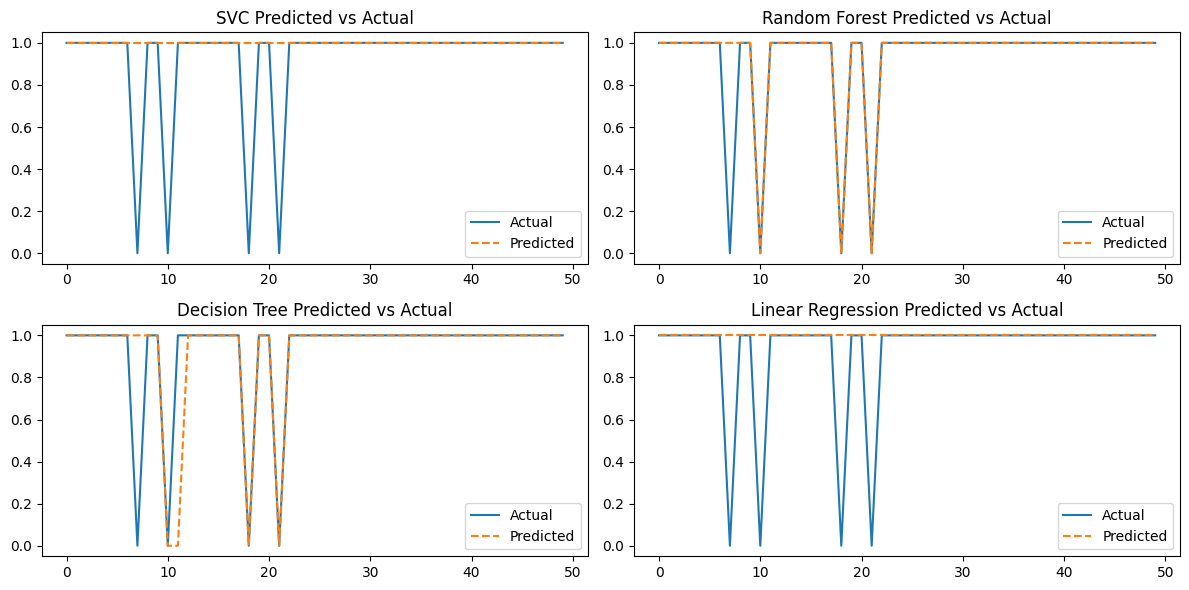

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Airline_Delay_Cause.csv')
data = pd.get_dummies(data, columns=['carrier_name', 'carrier', 'airport', 'airport_name'], drop_first=True)

# Now, convert the necessary numeric columns to float, if needed
numeric_columns = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 
                   'nas_ct', 'security_ct', 'late_aircraft_ct', 
                   'arr_delay', 'carrier_delay', 'weather_delay', 
                   'nas_delay', 'security_delay', 'late_aircraft_delay']

for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows with NaN values if any
data = data.dropna()

# Define features (X) and target (y)
X = data.drop(['arr_delay'], axis=1)  # assuming 'arr_delay' is the target column for delay prediction
y = data['arr_delay'].apply(lambda x: 1 if x > 15 else 0)  # binary classification: 1 for delayed, 0 otherwise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dictionary to store performance metrics for each model
results = {}

# Function to calculate classification metrics
def calculate_classification_metrics(y_true, y_pred, model_name):
    metrics = {
        'Mean Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted')
    }
    results[model_name] = metrics

# Function to calculate regression metrics
def calculate_regression_metrics(y_true, y_pred, model_name):
    metrics = {
        'MAP': np.mean(np.abs(y_true - y_pred)),  # Mean Absolute Percentage Error (MAPE)
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2 Error': r2_score(y_true, y_pred)
    }
    results[model_name] = metrics

# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
calculate_classification_metrics(y_test, y_pred_svc, 'Support Vector Classifier')

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
calculate_classification_metrics(y_test, y_pred_rfc, 'Random Forest Classifier')

# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
calculate_classification_metrics(y_test, y_pred_dtc, 'Decision Tree Classifier')

# Linear Regression (used as a classifier here for simplicity)
# Note: Adjust the target variable (y) to continuous values if performing regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr_classified = [1 if pred > 0.5 else 0 for pred in y_pred_lr]  # convert to binary for classification metrics
calculate_classification_metrics(y_test, y_pred_lr_classified, 'Linear Regression Classifier')

# Print performance metrics for each model
print("Model Performance Metrics:\n")
for model, metrics in results.items():
    print(f"{model} Metrics:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("\n")

# Plot Predicted vs Actual values for a sample of test data
plt.figure(figsize=(12, 6))

# SVC Predicted vs Actual
plt.subplot(2, 2, 1)
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred_svc[:50], label='Predicted', linestyle='--')
plt.title('SVC Predicted vs Actual')
plt.legend()

# Random Forest Predicted vs Actual
plt.subplot(2, 2, 2)
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred_rfc[:50], label='Predicted', linestyle='--')
plt.title('Random Forest Predicted vs Actual')
plt.legend()

# Decision Tree Predicted vs Actual
plt.subplot(2, 2, 3)
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred_dtc[:50], label='Predicted', linestyle='--')
plt.title('Decision Tree Predicted vs Actual')
plt.legend()

# Linear Regression Predicted vs Actual
plt.subplot(2, 2, 4)
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred_lr_classified[:50], label='Predicted', linestyle='--')
plt.title('Linear Regression Predicted vs Actual')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
print(results)

{'Support Vector Classifier': {'Mean Accuracy': 0.9318863500027267, 'Precision': 0.8684121693214044, 'Recall': 0.9318863500027267, 'F1 Score': 0.8990302864557004}, 'Random Forest Classifier': {'Mean Accuracy': 0.9979822217374706, 'Precision': 0.9979865813167824, 'Recall': 0.9979822217374706, 'F1 Score': 0.9979681446281821}, 'Decision Tree Classifier': {'Mean Accuracy': 0.9991819817854611, 'Precision': 0.99918128011948, 'Recall': 0.9991819817854611, 'F1 Score': 0.9991815258909791}, 'Linear Regression Classifier': {'Mean Accuracy': 0.9318863500027267, 'Precision': 0.8684121693214044, 'Recall': 0.9318863500027267, 'F1 Score': 0.8990302864557004}}



Model Performance Metrics:

Support Vector Classifier Metrics:
  Mean Accuracy: 0.9319
  Precision: 0.8684
  Recall: 0.9319
  F1 Score: 0.8990
------------------------------
Random Forest Classifier Metrics:
  Mean Accuracy: 0.9983
  Precision: 0.9983
  Recall: 0.9983
  F1 Score: 0.9982
------------------------------
Decision Tree Classifier Metrics:
  Mean Accuracy: 0.9991
  Precision: 0.9991
  Recall: 0.9991
  F1 Score: 0.9991
------------------------------
Linear Regression (Regression Metrics) Metrics:
  MAP: inf
  MAE: 0.1237
  R2 Error: 0.0418
------------------------------


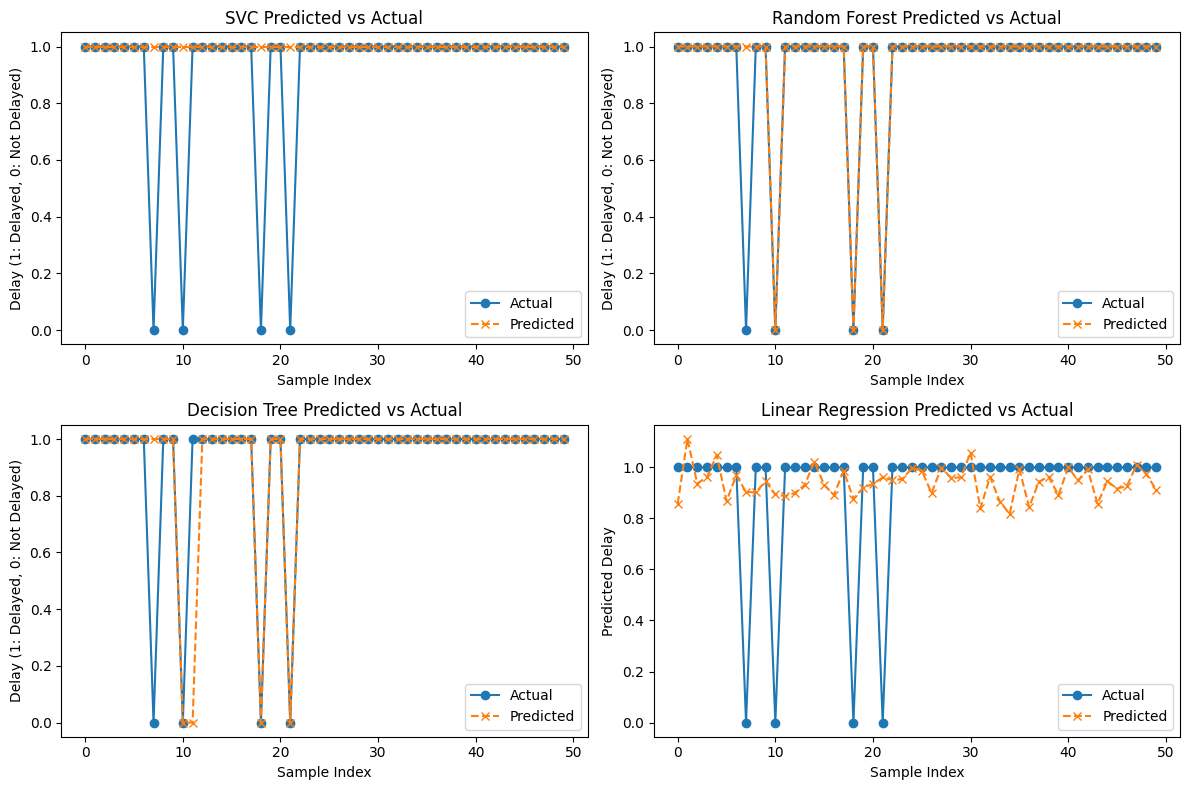

In [15]:
 import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    mean_absolute_error, 
    r2_score
)
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Airline_Delay_Cause.csv')
data = pd.get_dummies(data, columns=['carrier_name', 'carrier', 'airport', 'airport_name'], drop_first=True)

# Convert the necessary numeric columns to float, if needed
numeric_columns = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 
                   'nas_ct', 'security_ct', 'late_aircraft_ct', 
                   'arr_delay', 'carrier_delay', 'weather_delay', 
                   'nas_delay', 'security_delay', 'late_aircraft_delay']

for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows with NaN values if any
data = data.dropna()

# Define features (X) and target (y)
X = data.drop(['arr_delay'], axis=1)  # Assuming 'arr_delay' is the target column for delay prediction
y = data['arr_delay'].apply(lambda x: 1 if x > 15 else 0)  # Binary classification: 1 for delayed, 0 otherwise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dictionary to store performance metrics for each model
results = {}

# Function to calculate classification metrics
def calculate_classification_metrics(y_true, y_pred, model_name):
    metrics = {
        'Mean Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }
    results[model_name] = metrics

# Function to calculate regression metrics
def calculate_regression_metrics(y_true, y_pred, model_name):
    metrics = {
        'MAP': np.mean(np.abs((y_true - y_pred) / y_true)) * 100,  # Mean Absolute Percentage Error (MAPE)
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2 Error': r2_score(y_true, y_pred)
    }
    results[model_name] = metrics

# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
calculate_classification_metrics(y_test, y_pred_svc, 'Support Vector Classifier')
calculate_regression_metrics(y_test, y_pred_svc, 'Support Vector Classifier')


# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
calculate_classification_metrics(y_test, y_pred_rfc, 'Random Forest Classifier')
calculate_regression_metrics(y_test, y_pred_svc, 'Support Vector Classifier')


# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
calculate_classification_metrics(y_test, y_pred_dtc, 'Decision Tree Classifier')
calculate_regression_metrics(y_test, y_pred_svc, 'Support Vector Classifier')


# Linear Regression for predicting arrival delays
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
# For regression metrics, we can use the actual arrival delays as a target
calculate_regression_metrics(y_test, y_pred_lr, 'Linear Regression (Regression Metrics)')
calculate_classification_metrics(y_test, y_pred_svc, 'Support Vector Classifier')


# Print performance metrics for each model
print("\nModel Performance Metrics:\n")
for model, metrics in results.items():
    print(f"{model} Metrics:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 30)  # Separator for readability

# Plot Predicted vs Actual values for a sample of test data
plt.figure(figsize=(12, 8))

# SVC Predicted vs Actual
plt.subplot(2, 2, 1)
plt.plot(y_test.values[:50], label='Actual', marker='o', linestyle='-')
plt.plot(y_pred_svc[:50], label='Predicted', marker='x', linestyle='--')
plt.title('SVC Predicted vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Delay (1: Delayed, 0: Not Delayed)')
plt.legend()

# Random Forest Predicted vs Actual
plt.subplot(2, 2, 2)
plt.plot(y_test.values[:50], label='Actual', marker='o', linestyle='-')
plt.plot(y_pred_rfc[:50], label='Predicted', marker='x', linestyle='--')
plt.title('Random Forest Predicted vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Delay (1: Delayed, 0: Not Delayed)')
plt.legend()

# Decision Tree Predicted vs Actual
plt.subplot(2, 2, 3)
plt.plot(y_test.values[:50], label='Actual', marker='o', linestyle='-')
plt.plot(y_pred_dtc[:50], label='Predicted', marker='x', linestyle='--')
plt.title('Decision Tree Predicted vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Delay (1: Delayed, 0: Not Delayed)')
plt.legend()

# Linear Regression Predicted vs Actual
plt.subplot(2, 2, 4)
plt.plot(y_test.values[:50], label='Actual', marker='o', linestyle='-')
plt.plot(y_pred_lr[:50], label='Predicted', marker='x', linestyle='--')
plt.title('Linear Regression Predicted vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Delay')
plt.legend()

plt.tight_layout()
plt.show()



Model Performance Metrics:

Support Vector Classifier Metrics:
  Mean Accuracy: 0.9319
  Precision: 0.8684
  Recall: 0.9319
  F1 Score: 0.8990
------------------------------
Random Forest Classifier Metrics:
  Mean Accuracy: 0.9979
  Precision: 0.9979
  Recall: 0.9979
  F1 Score: 0.9979
------------------------------
Decision Tree Classifier Metrics:
  Mean Accuracy: 0.9992
  Precision: 0.9992
  Recall: 0.9992
  F1 Score: 0.9992
------------------------------
Linear Regression (Regression Metrics) Metrics:
  MAP: inf
  MAE: 0.1237
  R2 Error: 0.0418
------------------------------


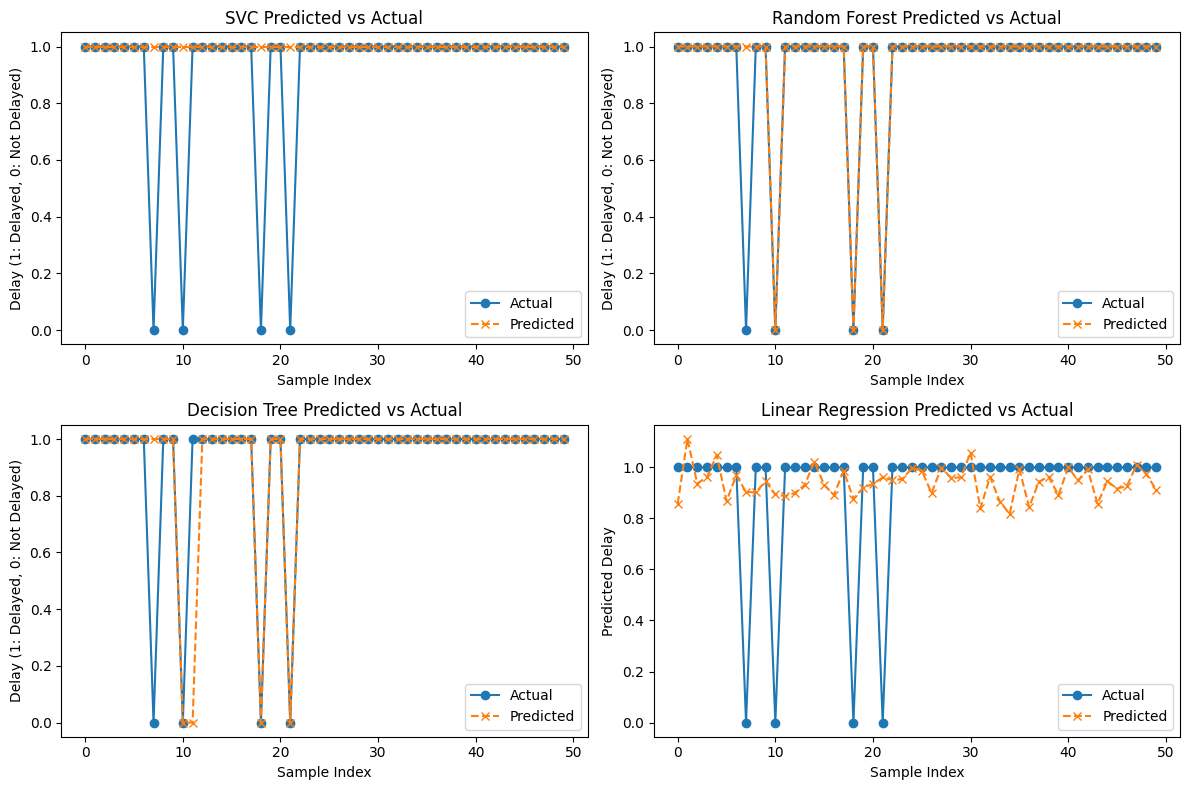

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    mean_absolute_error, 
    r2_score
)
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Airline_Delay_Cause.csv')
data = pd.get_dummies(data, columns=['carrier_name', 'carrier', 'airport', 'airport_name'], drop_first=True)

# Convert the necessary numeric columns to float, if needed
numeric_columns = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 
                   'nas_ct', 'security_ct', 'late_aircraft_ct', 
                   'arr_delay', 'carrier_delay', 'weather_delay', 
                   'nas_delay', 'security_delay', 'late_aircraft_delay']

for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows with NaN values if any
data = data.dropna()

# Define features (X) and target (y)
X = data.drop(['arr_delay'], axis=1)  # Assuming 'arr_delay' is the target column for delay prediction
y = data['arr_delay'].apply(lambda x: 1 if x > 15 else 0)  # Binary classification: 1 for delayed, 0 otherwise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dictionary to store performance metrics for each model
results = {}

# Function to calculate classification metrics
def calculate_classification_metrics(y_true, y_pred, model_name):
    metrics = {
        'Mean Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }
    results[model_name] = metrics

# Function to calculate regression metrics
def calculate_regression_metrics(y_true, y_pred, model_name):
    metrics = {
        'MAP': np.mean(np.abs((y_true - y_pred) / y_true)) * 100,  # Mean Absolute Percentage Error (MAPE)
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2 Error': r2_score(y_true, y_pred)
    }
    results[model_name] = metrics

# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
calculate_classification_metrics(y_test, y_pred_svc, 'Support Vector Classifier')
calculate_regression_metrics(y_test, y_pred_svc, 'Support Vector Classifier')


# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
calculate_classification_metrics(y_test, y_pred_rfc, 'Random Forest Classifier')
calculate_regression_metrics(y_test, y_pred_svc, 'Support Vector Classifier')


# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
calculate_classification_metrics(y_test, y_pred_dtc, 'Decision Tree Classifier')
calculate_regression_metrics(y_test, y_pred_svc, 'Support Vector Classifier')


# Linear Regression for predicting arrival delays
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
# For regression metrics, we can use the actual arrival delays as a target
calculate_regression_metrics(y_test, y_pred_lr, 'Linear Regression (Regression Metrics)')
calculate_classification_metrics(y_test, y_pred_svc, 'Support Vector Classifier')


# Print performance metrics for each model
print("\nModel Performance Metrics:\n")
for model, metrics in results.items():
    print(f"{model} Metrics:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 30)  # Separator for readability

# Plot Predicted vs Actual values for a sample of test data
plt.figure(figsize=(12, 8))

# SVC Predicted vs Actual
plt.subplot(2, 2, 1)
plt.plot(y_test.values[:50], label='Actual', marker='o', linestyle='-')
plt.plot(y_pred_svc[:50], label='Predicted', marker='x', linestyle='--')
plt.title('SVC Predicted vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Delay (1: Delayed, 0: Not Delayed)')
plt.legend()

# Random Forest Predicted vs Actual
plt.subplot(2, 2, 2)
plt.plot(y_test.values[:50], label='Actual', marker='o', linestyle='-')
plt.plot(y_pred_rfc[:50], label='Predicted', marker='x', linestyle='--')
plt.title('Random Forest Predicted vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Delay (1: Delayed, 0: Not Delayed)')
plt.legend()

# Decision Tree Predicted vs Actual
plt.subplot(2, 2, 3)
plt.plot(y_test.values[:50], label='Actual', marker='o', linestyle='-')
plt.plot(y_pred_dtc[:50], label='Predicted', marker='x', linestyle='--')
plt.title('Decision Tree Predicted vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Delay (1: Delayed, 0: Not Delayed)')
plt.legend()

# Linear Regression Predicted vs Actual
plt.subplot(2, 2, 4)
plt.plot(y_test.values[:50], label='Actual', marker='o', linestyle='-')
plt.plot(y_pred_lr[:50], label='Predicted', marker='x', linestyle='--')
plt.title('Linear Regression Predicted vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Delay')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
print(results
     )

{'Support Vector Classifier': {'Mean Accuracy': 0.9318863500027267, 'Precision': 0.8684121693214044, 'Recall': 0.9318863500027267, 'F1 Score': 0.8990302864557004}, 'Random Forest Classifier': {'Mean Accuracy': 0.997764083546927, 'Precision': 0.9977694354398907, 'Recall': 0.997764083546927, 'F1 Score': 0.9977467677357925}, 'Decision Tree Classifier': {'Mean Accuracy': 0.9992365163330971, 'Precision': 0.9992357551394179, 'Recall': 0.9992365163330971, 'F1 Score': 0.9992359487510412}, 'Linear Regression (Regression Metrics)': {'MAP': inf, 'MAE': 0.12373731583747807, 'R2 Error': 0.04183657780607153}}
